In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts 




In [3]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
pro_df=df.drop(['PassengerId','Name','SibSp',"Parch","Ticket",'Cabin',"Embarked"],axis=1,inplace=False)
pro_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [5]:
input_df=pro_df.drop(['Survived'],axis=1,inplace=False)
target=pro_df['Survived']
input_df
from sklearn.preprocessing import LabelEncoder as LE
LE=LE()
input_df['ENC_SEX']=LE.fit_transform(input_df['Sex'])
input_df
pro_input=input_df.drop('Sex',axis=1,inplace=False)
pro_input


,Pclass,Age,Fare,ENC_SEX
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [6]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
x_train,x_test,y_train,y_test=tts(pro_input,target,test_size=0.2,random_state=42)    #splitting the data into training and testing data
from sklearn.tree import DecisionTreeClassifier as DTC
model=DTC()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [8]:
pred_surv=model.predict(x_test)
pred_surv
str_pred_surv=['Survived' if i==1 else 'Not Survived' for i in pred_surv]
str_pred_surv

['Not Survived',
 'Not Survived',
 'Survived',
 'Survived',
 'Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Not Survived',
 'Survived',
 'Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Survived',
 'Survived',
 'Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Survived',
 'Survived',
 'Survived',
 'Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Not Survived',
 'Survived',
 'Not Survived',
 'Survived',
 'Survived',
 'Survived',
 'Not Survived',
 'No

In [9]:
model_score=model.score(x_test,y_test)
model_score

0.770949720670391

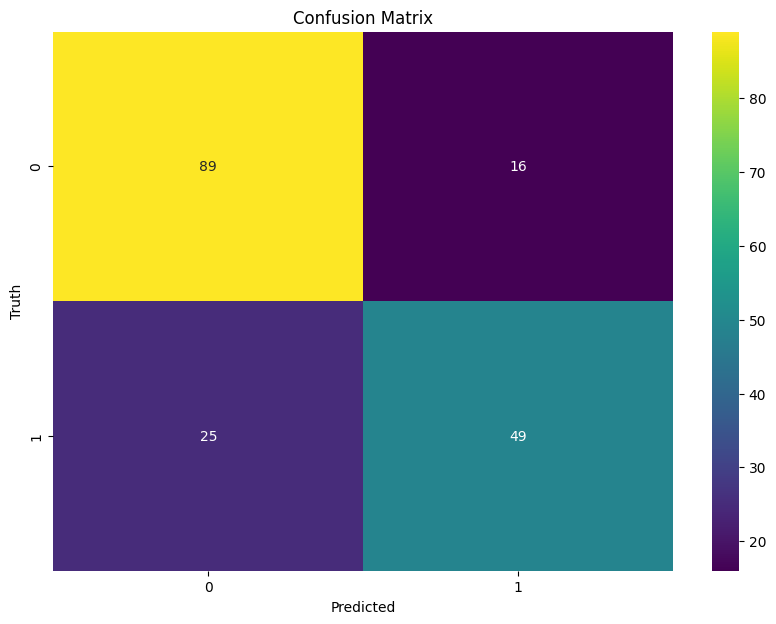

In [10]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(y_test,pred_surv)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

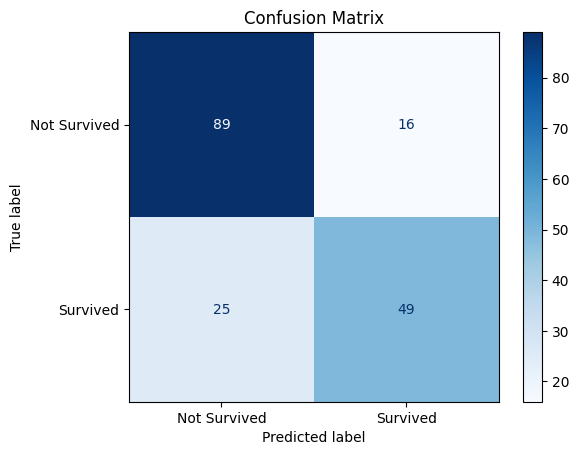

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and pred_surv are defined
cm = confusion_matrix(y_test, pred_surv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import classification_report

# Assuming y_test and pred_surv are defined
report = classification_report(y_test, pred_surv, target_names=['Not Survived', 'Survived'],output_dict=True)
report_df=pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Not Survived,0.780702,0.847619,0.812785,105.00000
Survived,0.753846,0.662162,0.705036,74.00000
accuracy,0.770950,0.770950,0.770950,0.77095
macro avg,0.767274,0.754891,0.758911,179.00000
weighted avg,0.769599,0.770950,0.768241,179.00000


In [13]:

from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['class', 'precision', 'recall', 'f1-score', 'support']
for label, metrices in report.items():
    if isinstance(metrices, dict):     #ignoring the accuracy row
        table.add_row([label,round(metrices['precision'],2),round(metrices['recall'],2),
                       round(metrices['f1-score'],2),int(metrices['support'])])
        
print(table)
    

+--------------+-----------+--------+----------+---------+
|    class     | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
| Not Survived |    0.78   |  0.85  |   0.81   |   105   |
|   Survived   |    0.75   |  0.66  |   0.71   |    74   |
|  macro avg   |    0.77   |  0.75  |   0.76   |   179   |
| weighted avg |    0.77   |  0.77  |   0.77   |   179   |
+--------------+-----------+--------+----------+---------+


<Figure size 1000x700 with 0 Axes>

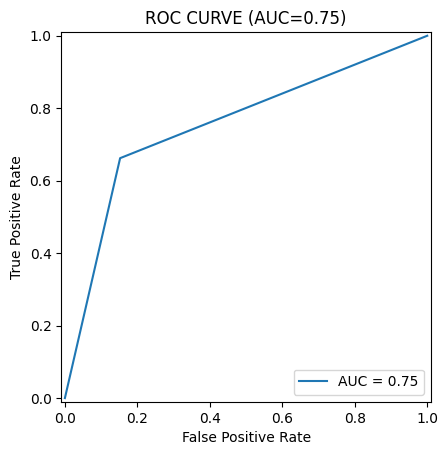

In [14]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay as RCD

fpr, tpr, threshold = roc_curve(y_test, pred_surv)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10,7))
roc_display = RCD(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.title(f'ROC CURVE (AUC={roc_auc:.2f})')
plt.show()


In [18]:
fpr

array([0.        , 0.15238095, 1.        ])

In [19]:
tpr

array([0.        , 0.66216216, 1.        ])

In [20]:
threshold

array([inf,  1.,  0.])

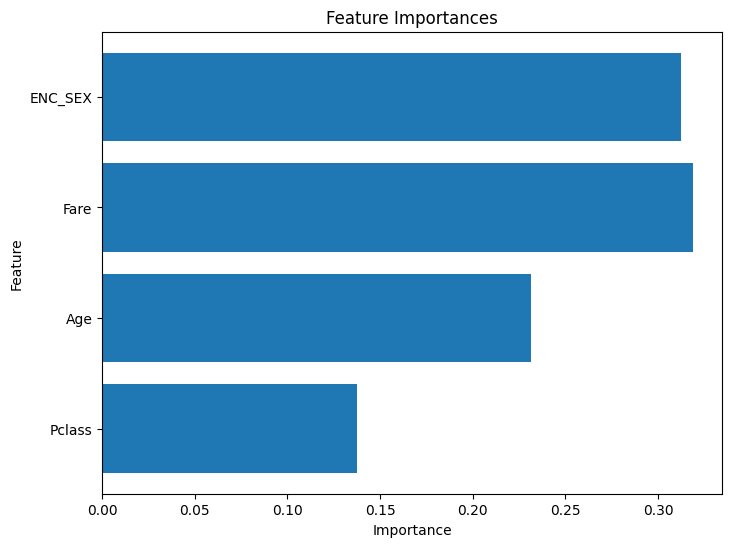

In [28]:
import matplotlib.pyplot as plt

# Assuming your model is a decision tree classifier
importances = model.feature_importances_

# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.barh(pro_input.columns, importances)  # Excluding the target column
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [29]:
pro_input

,Pclass,Age,Fare,ENC_SEX
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


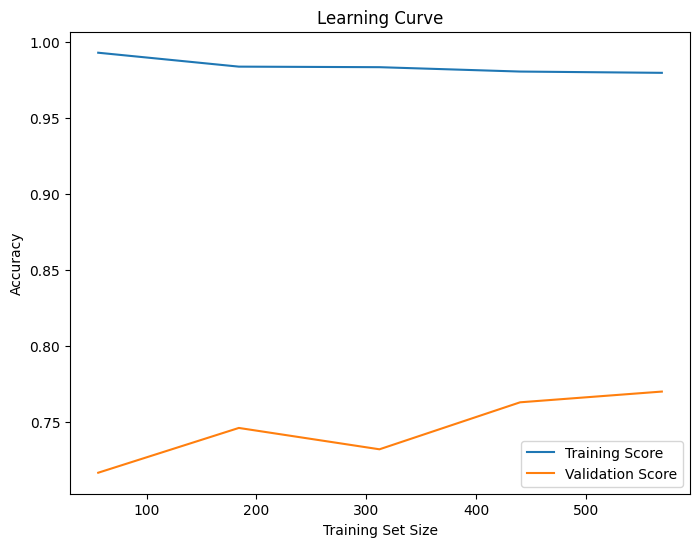

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)

# Plotting learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
